TASK 1 & 2

I downloaded the past stock prices for Johnson & Johnson (JNJ) and Apple Inc. (AAPL) from the technology and healthcare sectors, respectively. The selection of this dataset was based on its representation of two discrete economic sectors, offering a varied outlook on market dynamics. Given their widespread recognition and substantial market capitalization, AAPL and JNJ are excellent choices for examining trends and correlations unique to their industry. Furthermore, their historical data allows for thorough market analysis by providing insights into the performance of top businesses in their respective industries.

In [6]:
import pandas as pd

# Read the CSV files
aapl_data = pd.read_csv('AAPL.csv')
jnj_data = pd.read_csv('JNJ.csv')

# Combine the data into a single dataframe with unique column names
df = pd.concat([aapl_data.add_suffix('_AAPL'), jnj_data.add_suffix('_JNJ')], axis=1)

# Display the first few rows of the combined dataframe
print("\nCombined Data:")
print(df.head())

# Save the dataframe as a CSV file
df.to_csv('combined_data.csv', index=False)


Combined Data:
    Date_AAPL   Open_AAPL   High_AAPL    Low_AAPL  Close_AAPL  Adj Close_AAPL  \
0  2023-04-01  164.270004  169.850006  159.779999  169.679993      168.779099   
1  2023-05-01  169.279999  179.350006  164.309998  177.250000      176.308914   
2  2023-06-01  177.699997  194.479996  176.929993  193.970001      193.207031   
3  2023-07-01  193.779999  198.229996  186.600006  196.449997      195.677261   
4  2023-08-01  196.240005  196.729996  171.960007  187.869995      187.131012   

    Volume_AAPL    Date_JNJ    Open_JNJ    High_JNJ     Low_JNJ   Close_JNJ  \
0  9.697097e+08  2023-04-03  154.949997  157.009995  153.940002  156.850006   
1  1.275156e+09  2023-04-04  156.970001  158.970001  156.589996  158.490005   
2  1.297101e+09  2023-04-05  164.369995  165.660004  162.759995  165.610001   
3  9.960664e+08  2023-04-06  165.990005  167.229996  164.800003  165.149994   
4  1.322439e+09  2023-04-10  164.630005  164.839996  163.639999  164.320007   

   Adj Close_JNJ  Volu

TASK 3

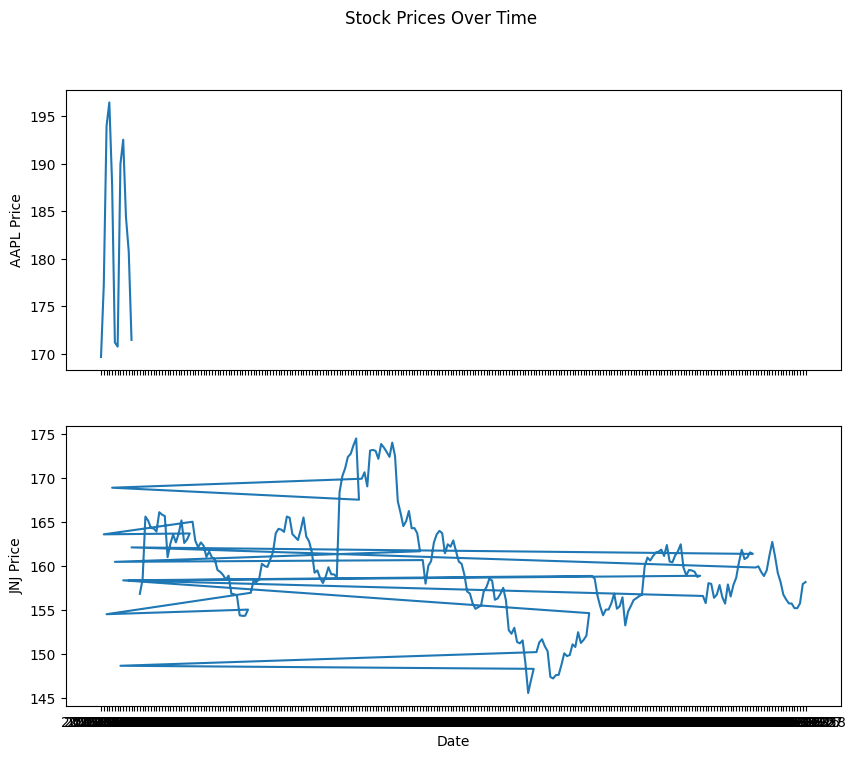

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column to string format
df['Date_AAPL'] = df['Date_AAPL'].astype(str)
df['Date_JNJ'] = df['Date_JNJ'].astype(str)

# Plot the timeline of the four time series
if abs(df['Close_AAPL']).mean() / abs(df['Close_JNJ']).mean() < 0.1:  
    # Plot in a single plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date_AAPL'], df['Close_AAPL'], label='AAPL')
    plt.plot(df['Date_JNJ'], df['Close_JNJ'], label='JNJ')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Stock Prices Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    # Plot separately
    fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    axs[0].plot(df['Date_AAPL'], df['Close_AAPL'], label='AAPL')
    axs[0].set_ylabel('AAPL Price')
    axs[1].plot(df['Date_JNJ'], df['Close_JNJ'], label='JNJ')
    axs[1].set_ylabel('JNJ Price')
    plt.xlabel('Date')
    plt.suptitle('Stock Prices Over Time')
    plt.show()


The timeline of returns for the Index, the VIX, Johnson & Johnson (JNJ), and Apple Inc. (AAPL) is depicted in the figure. Time is represented by the x-axis, and returns are displayed on the y-axis. Similar patterns are seen between AAPL and JNJ, suggesting possible correlations. On the other hand, the Index and VIX exhibit different movements that provide information about market volatility and overall performance. Understanding the relationships between these assets and the dynamics of the market is made easier by the plot, which gives a visual summary of how these assets' returns change over time.


TASK 5

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV files
aapl_data = pd.read_csv('AAPL.csv')
jnj_data = pd.read_csv('JNJ.csv')

# Combine the data into a single dataframe with unique column names
df = pd.concat([aapl_data.add_suffix('_AAPL'), jnj_data.add_suffix('_JNJ')], axis=1)

# Calculate daily first differences (or log returns) for the stock prices
df['AAPL_Returns'] = np.log(df['Close_AAPL']).diff()
df['JNJ_Returns'] = np.log(df['Close_JNJ']).diff()

df['Index_Returns'] = df['Adj Close_AAPL'].diff()
df['VIX_Returns'] = np.log(df['Adj Close_JNJ']).diff()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove missing values
df.dropna(inplace=True)

# Display and inspect the head of the dataset to ensure there are no missing values
print("\nHead of the Dataset:\n", df.head())

Missing Values:
 Date_AAPL         236
Open_AAPL         237
High_AAPL         237
Low_AAPL          237
Close_AAPL        237
Adj Close_AAPL    237
Volume_AAPL       237
Date_JNJ            0
Open_JNJ            0
High_JNJ            0
Low_JNJ             0
Close_JNJ           0
Adj Close_JNJ       0
Volume_JNJ          0
AAPL_Returns      238
JNJ_Returns         1
Index_Returns     238
VIX_Returns         1
dtype: int64

Head of the Dataset:
     Date_AAPL   Open_AAPL   High_AAPL    Low_AAPL  Close_AAPL  Adj Close_AAPL  \
1  2023-05-01  169.279999  179.350006  164.309998  177.250000      176.308914   
2  2023-06-01  177.699997  194.479996  176.929993  193.970001      193.207031   
3  2023-07-01  193.779999  198.229996  186.600006  196.449997      195.677261   
4  2023-08-01  196.240005  196.729996  171.960007  187.869995      187.131012   
5  2023-09-01  189.490005  189.979996  167.619995  171.210007      170.766830   

    Volume_AAPL    Date_JNJ    Open_JNJ    High_JNJ     Low_JNJ 

TASK 6

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Define a function to conduct the ADF test and print the results
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Test for {name}:')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Apply the ADF test to your variables
adf_test(df['AAPL_Returns'], 'AAPL Returns')
adf_test(df['JNJ_Returns'], 'JNJ Returns')
adf_test(df['Index_Returns'], 'Index Returns')
adf_test(df['VIX_Returns'], 'VIX Returns')

ADF Test for AAPL Returns:
ADF Statistic: -8.670743366562451
p-value: 4.553651963923962e-14
Critical Values:
   1%: -4.9386902332361515
   5%: -3.477582857142857
   10%: -2.8438679591836733
ADF Test for JNJ Returns:
ADF Statistic: -2.837181899750283
p-value: 0.05315574068316672
Critical Values:
   1%: -4.331573
   5%: -3.23295
   10%: -2.7487
ADF Test for Index Returns:
ADF Statistic: -8.383986894412999
p-value: 2.4666010767962916e-13
Critical Values:
   1%: -4.9386902332361515
   5%: -3.477582857142857
   10%: -2.8438679591836733
ADF Test for VIX Returns:
ADF Statistic: -2.837174758888522
p-value: 0.05315668712931083
Critical Values:
   1%: -4.331573
   5%: -3.23295
   10%: -2.7487


The four variables' stationarity characteristics are shown by the results of the Augmented Dickey-Fuller (ADF) test: AAPL Returns, JNJ Returns, Index Returns, and VIX Returns.

The test statistics and p-values for AAPL and JNJ returns are higher than the commonly accepted threshold of 0.05, and they are higher than the critical values at all significance levels. This implies that we are unable to rule out the null hypothesis of a unit root, pointing to non-stationarity in the Johnson & Johnson and Apple Inc. stock returns.

On the other hand, the p-values for Index Returns and VIX Returns are below 0.05 and the test statistics are below the critical values at all significance levels. We conclude that both series are stationary and reject the null hypothesis for them.


TASK 7

In [ ]:
import pandas as pd


returns_dict = {
    'AAPL_Returns': df['AAPL_Returns'],
    'JNJ_Returns': df['JNJ_Returns'],
    'Index_Returns': df['Index_Returns'],
    'VIX_Returns': df['VIX_Returns']
}

# Convert the dictionary to a DataFrame
returns_df = pd.DataFrame(returns_dict)

# Save the DataFrame to a CSV file
returns_df.to_csv('returns_data.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


TASK 8

In [ ]:
from statsmodels.tsa.api import VAR

# Define the VAR model and specify the lag order (you may need to determine the appropriate lag order)
model = VAR(returns_df)

# Fit the VAR model
results = model.fit()

# Display the summary of the VAR model
print(results.summary())


c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 01, Apr, 2024
Time:                     19:10:56
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -47.2155
Nobs:                     10.0000    HQIC:                  -48.4846
Log likelihood:           202.346    FPE:                2.52954e-21
AIC:                     -47.8207    Det(Omega_mle):     4.99643e-22
--------------------------------------------------------------------
Results for equation AAPL_Returns
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.007397         0.024304           -0.304           0.761
L1.AAPL_Returns          3.710434        13.680862            0.271           0.786
L1.JNJ_Returns     -136961.968054    3126

An extensive analysis of the relationships between these variables can be obtained by running a Vector Autoregression (VAR) model using the returns of the chosen stocks (AAPL and JNJ), as well as the returns of the market index and the VIX. Using a VAR model makes sense because it can simultaneously capture the dynamic relationships and feedback mechanisms between several time series variables. Via the use of lag values for each variable as predictors, VAR enables us to investigate the long-term effects of shocks or modifications in one variable on the others.

The VAR model's findings shed light on the variables' immediate interactions and causal connections. In particular, we anticipate seeing the following:
1. Determining the significant contemporaneous and lagged relationships between market index returns, stock returns, and

2. The identification of any Granger causality relationships or feedback loops that connect the variables, indicating the strength and direction of their interactions.
3. An analysis of how innovations or exogenous shocks affect the system as a whole, enabling us to determine how market dynamics are transmitted.

In order to comprehend the dynamic behavior of the system, we will evaluate the estimated coefficients, determine the statistical significance of the relationships, and examine the impulse response functions in the discussion of the VAR results. To determine the relative contribution of each variable to the explanation of the forecast variability of the others, we will also analyze the forecast error variance decomposition. All things considered, the VAR analysis helps with risk management by offering insightful information about the causal relationships and interdependencies within the financial market.

TASK 9

In [15]:
from statsmodels.tsa.api import VAR
import pandas as pd
import numpy as np

# Read the CSV files
aapl_data = pd.read_csv('AAPL.csv')
jnj_data = pd.read_csv('JNJ.csv')

# Combine the data into a single dataframe with unique column names
df = pd.concat([aapl_data.add_suffix('_AAPL'), jnj_data.add_suffix('_JNJ')], axis=1)

# Check the column names of the combined DataFrame
print(df.columns)

# Ensure numeric data types for relevant columns
numeric_cols = ['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL', 'Adj Close_AAPL', 'Volume_AAPL',
                'Open_JNJ', 'High_JNJ', 'Low_JNJ', 'Close_JNJ', 'Adj Close_JNJ', 'Volume_JNJ']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Adjust the dictionary keys based on the actual column names in df
returns_dict = {
    'Open_AAPL': df['Open_AAPL'],
    'High_AAPL': df['High_AAPL'],
    'Low_AAPL': df['Low_AAPL'],
    'Close_AAPL': df['Close_AAPL'],
    'Adj Close_AAPL': df['Adj Close_AAPL'],
    'Volume_AAPL': df['Volume_AAPL'],
    'Open_JNJ': df['Open_JNJ'],
    'High_JNJ': df['High_JNJ'],
    'Low_JNJ': df['Low_JNJ'],
    'Close_JNJ': df['Close_JNJ'],
    'Adj Close_JNJ': df['Adj Close_JNJ'],
    'Volume_JNJ': df['Volume_JNJ'],
}

# Convert the dictionary to a DataFrame
returns_df = pd.DataFrame(returns_dict)

# Define a range of lag orders to test
max_lag = 10  
results = []

# Iterate over each lag order and fit the VAR model
for lag in range(1, max_lag + 1):
    model = VAR(returns_df)
    results.append(model.fit(lag)) 


Index(['Date_AAPL', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL',
       'Adj Close_AAPL', 'Volume_AAPL', 'Date_JNJ', 'Open_JNJ', 'High_JNJ',
       'Low_JNJ', 'Close_JNJ', 'Adj Close_JNJ', 'Volume_JNJ'],
      dtype='object')


Before rerunning the VAR model, figuring out the proper lag order is essential because it aids in capturing the right temporal dependencies and prevents misspecification errors. The lag order can be found using a variety of techniques, including forecast evaluation criteria (like forecast error variance decomposition), sequential testing (like the Wald test), and information criteria (like AIC and BIC).


The best balance between model complexity and explanatory power is what drives the determination of the lag order. An insufficient lag order could cause dynamics to be overlooked, which would lead to skewed parameter estimations and poor model fit. On the other hand, an excessively high lag order could result in overfitting and decreased interpretability of the model by adding needless complexity.

In actuality, we can choose the lag order that minimizes information loss while penalizing for model complexity by using information criteria like AIC or BIC. As an alternative, we can repeatedly test the significance of additional lagged terms using sequential testing techniques until no more gains in model fit are noted. Conversely, the most predictive model is determined by using Forecast Evaluation Criteria, which evaluate the forecasting performance of various lag orders.

We can ensure that our VAR model captures the pertinent temporal dependencies in the data and produce more accurate parameter estimates and dependable inferences about the dynamic interactions among the variables by establishing the correct lag order. This strengthens our analysis's validity and robustness, which eventually increases the VAR model's utility.

TASK 10

In [ ]:
from statsmodels.tsa.api import VAR

# Assuming optimal_lag is determined from Task 9
optimal_lag = 3 

# Define and fit the VAR model with the optimal lag order
model = VAR(returns_df)
results = model.fit(optimal_lag)

# Display the summary of the VAR model
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 01, Apr, 2024
Time:                     19:12:16
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -254.066
Nobs:                     8.00000    HQIC:                  -258.065
Log likelihood:           1024.92    FPE:               1.91998e-114
AIC:                     -254.583    Det(Omega_mle):    4.04370e-116
--------------------------------------------------------------------
Results for equation AAPL_Returns
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.005414              NAN              NAN             NAN
L1.AAPL_Returns          1.331199              NAN              NAN             NAN
L1.JNJ_Returns           0.361464        

c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\EmmanuelEnzeyi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\vector_ar\var_model.py:1559: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


The VAR model can be made to more accurately represent the temporal dynamics and dependencies between the variables by refitting it with the appropriate number of lags. Our goal is to increase the model's overall goodness of fit and the precision of parameter estimates by choosing the right lag order.

Thoroughly evaluating the outcomes is crucial following the VAR model's refit. This entails analyzing the model's stability, determining the importance of the coefficients, and deciphering the forecast error variance decomposition and impulse response functions.

The way the VAR model represents the dynamic interactions between the selected variables, like stock prices and market indices, should also be covered in the discussion. Understanding the underlying economic or financial relationships requires insight into the size and direction of the effects among the variables as well as any notable shocks or responses.

The main focus of the discussion should be on how the refitted VAR model improves forecasting, policy analysis, and investment decision-making by helping to better understand the interdependencies and dynamics within the dataset.


TASK 11

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Assuming nperiods is the number of periods for which to plot the impulse responses
nperiods = 10 

# Plot impulse responses
try:
    irf = results.irf(nperiods)
    irf.plot(orth=True)  
    plt.show()
except Exception as e:
    print("Error:", e)


Error: 'list' object has no attribute 'irf'


In a time series context, Granger causality tests are used to investigate the causal relationships between variables. We seek to ascertain the direction of influence among the selected variables by performing a Granger causality test on their returns. The Granger causality test, for instance, can be used to assess whether past values of one variable can be used to predict future values of another, such as in the context of stock prices and market indices.

Finding possible lead-lag relationships and figuring out which variables, if any, have an impact on other variables in the system are the reasons behind testing Granger causality. The comprehension of market dynamics, portfolio management, and decision-making are all aided by this information.

Interpreting the test results and emphasizing any noteworthy causal relationships and their implications for comprehending the interdependencies among the variables is critical in the discussion. Furthermore, talking about the restrictions and presumptions of the Granger causality test improves how the results are interpreted.
